In [1]:
from CFRalgorithm import TempleCFR

if __name__ == "__main__":
	k = TempleCFR(1_000, {})
	utilities = k.cfr_iterations_external()

  0%|          | 0/1000 [00:00<?, ?it/s]


NameError: name 'card' is not defined

In [2]:
len(k.nodes) 

23587

In [9]:
for node in k.nodes:
    if k.nodes[node].get_average_strategy()[0]!=.5:
        print(node)
        print("regret_sum",k.nodes[node].regret_sum)
        print("strategy",k.nodes[node].get_strategy())
        print("strategy sum",k.nodes[node].strategy_sum)    
        print("average strategy",k.nodes[node].get_average_strategy())

P:0,C:FireGold->(P:1,A:[1, 0])->(P:2,A:[0, 1])->(P:0
regret_sum [3947.91966476 4357.40730041]
strategy [0.47534789 0.52465211]
strategy sum [51274780.02708311 60024860.97291695]
average strategy [0.46069133 0.53930867]
P:0,C:FireGold->(P:1,A:[1, 0])->(P:2,A:[0, 1])->(P:0,A:[1, 0])->(P:1,A:2)->(P:2,A:1)->(P:1,A:0)->(P:0
regret_sum [13511.77126889 12682.7692001 ]
strategy [0.51582395 0.48417605]
strategy sum [5599491.30299643 5260732.69700356]
average strategy [0.5155963 0.4844037]
P:0,C:FireGold->(P:1,A:[1, 0])->(P:2,A:[0, 1])->(P:0,A:[0, 1])->(P:1,A:0)->(P:0
regret_sum [ 375.51677844 1778.01751091]
strategy [0.17437232 0.82562768]
strategy sum [10013617.76481426 44969796.23518568]
average strategy [0.1821207 0.8178793]
P:0,C:FireGold->(P:1,A:[1, 0])->(P:2,A:[0, 1])->(P:0,A:[0, 1])->(P:1,A:0)->(P:0,A:1)->(P:1,A:0)->(P:0
regret_sum [2951.34449628 3975.24948023]
strategy [0.42608885 0.57391115]
strategy sum [11365205.74438232 15472662.25561769]
average strategy [0.42347648 0.57652352]
P:1

In [10]:
import json

with open('cfr_strategies.json', 'w') as f:
    dump = {node: tuple(k.nodes[node].get_average_strategy()) for node in k.nodes}
    json.dump(dump, f)
    

In [11]:
import json

## open JSON file
with open('cfr_strategies.json') as f:
    data = json.load(f)

data = {node.replace("[1, 0]", "Fire"): data[node] for node in data.keys()}
data = {node.replace("[0, 1]", "NoFire"): data[node] for node in data.keys()}

## open JSON file
with open('cfr_strategies_decoded.json', 'w') as f:
    json.dump(data, f)

In [12]:
with open('cfr_strategies_decoded.json') as f:
    data = json.load(f)
data

{'P:0,C:FireGold->(P:1': [0.5, 0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2': [0.5, 0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0': [0.4606913334705463,
  0.5393086665294538],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1': [0.5,
  0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:2)->(P:2': [0.5,
  0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:2)->(P:2,A:1)->(P:1': [0.5,
  0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:2)->(P:2,A:1)->(P:1,A:0)->(P:0': [0.515596299210443,
  0.4844037007895571],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:NoFire)->(P:1': [0.5,
  0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:NoFire)->(P:1,A:0)->(P:0': [0.18212069852218107,
  0.817879301477819],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:NoFire)->(P:1,A:0)->(P:0,A:1)->(P:1': [0.5,
  0.5],
 'P:0,C:FireGold->(P:1,A:Fire)->(P:2,A:NoFire)->(P:0,A:NoFire)->(P:1

<Axes: >

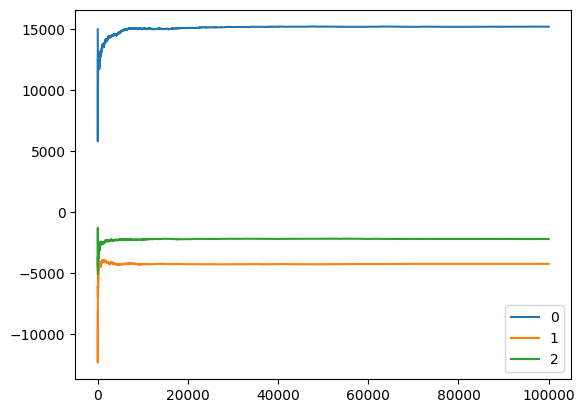

In [7]:
import pandas as pd
pd.DataFrame(utilities).plot()